In [2]:
from prody import *
from numpy import *
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
from os.path import basename
import fnmatch
import os
from matplotlib.colors import LogNorm
from sklearn import mixture
from sklearn.cluster import MeanShift
from scipy.stats import kurtosis
from scipy.stats import skew

In [3]:
structure_names = ["5heb","5hed","5hey","5hf1","5hfb","5hfc","5hfe","5hff"]
variables = []
variable_names = []

In [5]:
for str_name in structure_names:
    array_1 = np.loadtxt(str(str_name+"_eq_hbonds.dat"))
    array_2 = np.loadtxt(str(str_name+"_protein_eq_hbonds.dat"))
    arrays = np.concatenate((array_1[:,1],array_2[:,1]),axis= None)
    print(str_name[1:])
    exec("%s = %s" % (str_name[1:],"arrays"))
    exec("variables.append(%s)" % (str_name[1:]))
    variable_names.append(str_name[1:])

heb
hed
hey
hf1
hfb
hfc
hfe
hff


In [4]:
variables_flat = np.asarray(variables).flatten()
len(variables_flat)

19200

In [5]:
print(np.mean(variables_flat))
print(np.median(variables_flat))
print(np.std(variables_flat))
print(np.max(variables_flat))
print(np.min(variables_flat))

3.4770833333333333
3.0
1.6562997896080154
11.0
0.0


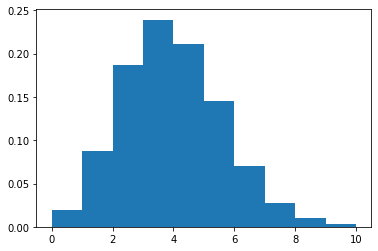

In [6]:
tail_dist_hist = np.histogram(variables_flat,bins=np.arange(0,11,1), density=True)

plt.hist(variables_flat, bins=np.arange(0,11,1), density=True);
plt.savefig("all_hbonds.png")
plt.show()
plt.close()

In [7]:
print(kurtosis(tail_dist_hist[0]))
print(skew(tail_dist_hist[0]))

-1.412178738178887
0.3761664785594982


heb calculations


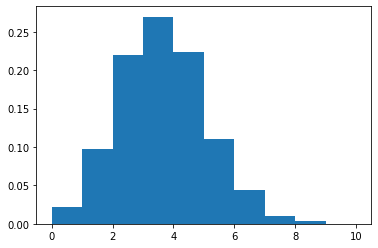

mean: 3.15625
median: 3.0
std: 1.4440115203256978
max: 8.0
min: 0.0


kurtosis: -1.271219801843585
skewness: 0.5601783624927502


hed calculations


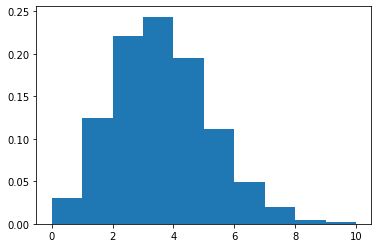

mean: 3.120833333333333
median: 3.0
std: 1.607140101408572
max: 11.0
min: 0.0


kurtosis: -1.3940204847863076
skewness: 0.4084426105158435


hey calculations


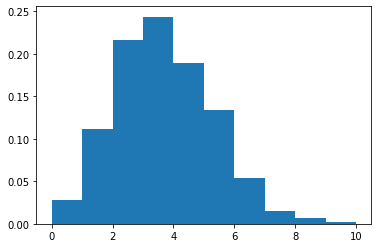

mean: 3.205416666666667
median: 3.0
std: 1.6106067158234365
max: 11.0
min: 0.0


kurtosis: -1.405747740717532
skewness: 0.3685355553563025


hf1 calculations


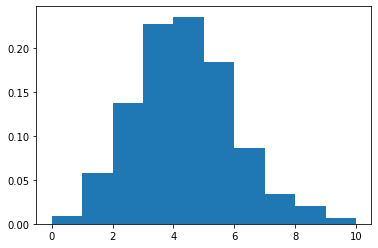

mean: 3.86375
median: 4.0
std: 1.6636363597553403
max: 10.0
min: 0.0


kurtosis: -1.370798172049899
skewness: 0.44798847021478433


hfb calculations


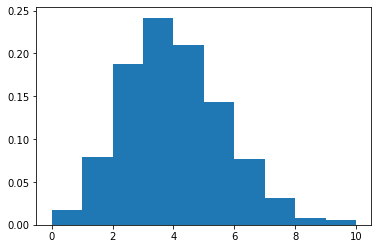

mean: 3.53
median: 3.0
std: 1.666313295872058
max: 10.0
min: 0.0


kurtosis: -1.3763547466189536
skewness: 0.39567386059101484


hfc calculations


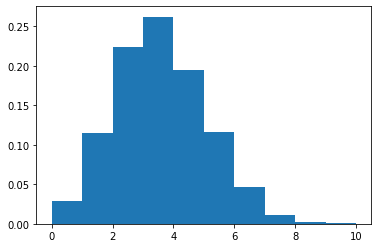

mean: 3.0879166666666666
median: 3.0
std: 1.505884234059474
max: 9.0
min: 0.0


kurtosis: -1.262387399377365
skewness: 0.48285868412261784


hfe calculations


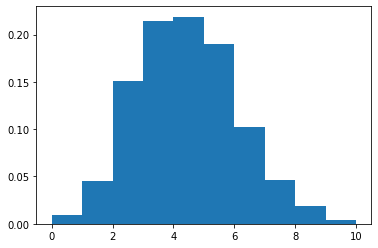

mean: 3.9466666666666668
median: 4.0
std: 1.674959369324787
max: 11.0
min: 0.0


kurtosis: -1.5711961123731086
skewness: 0.27661188938218984


hff calculations


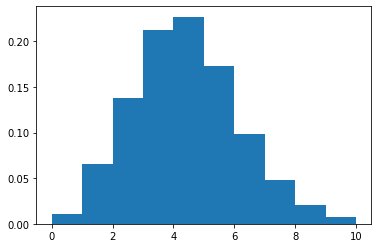

mean: 3.9058333333333333
median: 4.0
std: 1.7479414479768924
max: 11.0
min: 0.0


kurtosis: -1.3603092885405366
skewness: 0.34769558371623893




In [8]:
for i in range(8):
    print(variable_names[i]+" calculations")

    tail_dist_hist = np.histogram(variables[i],bins=np.arange(0,11,1), density=True)
    np.savetxt(variable_names[i]+"_hbonds_prob_dist.dat", tail_dist_hist[0])
    plt.hist(variables[i], bins=np.arange(0,11,1), density=True);
    plt.savefig(variable_names[i]+"_hbonds.png")
    plt.show()
    plt.close()
    print("mean: "+str(np.mean(variables[i])))
    print("median: "+str(np.median(variables[i])))
    print("std: "+str(np.std(variables[i])))
    print("max: "+str(np.max(variables[i])))
    print("min: "+str(np.min(variables[i])))
    print("\n")
    print("kurtosis: "+str(kurtosis(tail_dist_hist[0])))
    print("skewness: "+str(skew(tail_dist_hist[0])))
    print("\n")

In [11]:
np.savetxt("bin_size_hbonds.dat",np.arange(0,11,1),fmt="%d")

In [8]:
hbonds_mean_list_dec = []
for i in range(8):
    print(variable_names[i]+" calculations")

    hbonds_mean_list_dec.append(np.around(np.mean(variables[i]), decimals=2))
print(hbonds_mean_list_dec)

heb calculations
hed calculations
hey calculations
hf1 calculations
hfb calculations
hfc calculations
hfe calculations
hff calculations
[3.16, 3.12, 3.21, 3.86, 3.53, 3.09, 3.95, 3.91]


In [5]:
for i in range(8):
    print(variable_names[i]+" calculations")

    print(np.std(variables[i]))

heb calculations
1.4440115203256978
hed calculations
1.607140101408572
hey calculations
1.6106067158234365
hf1 calculations
1.6636363597553403
hfb calculations
1.666313295872058
hfc calculations
1.505884234059474
hfe calculations
1.674959369324787
hff calculations
1.7479414479768924


In [7]:
    array_1 = np.loadtxt("5hfb_eq_hbonds.dat")
    array_2 = np.loadtxt("5hfb_protein_eq_hbonds.dat")

In [8]:
print(np.mean(array_1[:,1]))
print(np.std(array_1[:,1]))

3.3066666666666666
1.5888010853750347


In [9]:
print(np.mean(array_2[:,1]))
print(np.std(array_2[:,1]))

3.7533333333333334
1.7114775942312408
